## Assignment #4: Deep Neural Networks - Heart Sound Classification using LSTM with Attention

### Hesam Mousavi 9931155

#### 1. Introduction

In this project, we aim to build a sequential model using LSTM with attention mechanism for heart sound classification. The phonocardiogram (PCG) dataset consists of heart sound recordings collected from different locations on the body, including both normal and abnormal recordings. The goal is to detect abnormal heart sounds, which can provide valuable information for the appraisal of heart disease and pulmonary hypertension.

#### 2. Methodology

##### 2.1 Data Preprocessing

- The '.wav' files of PCG records were read and labeled as normal or abnormal using the 'REFERENCE.csv' files.
- Signal values were normalized to ensure they fall within the range of -1 to 1.
- The minimum length of the signals was determined, and all signals were adjusted to this length.

##### 2.2 LSTM Network with Attention Mechanism

- The LSTM network with attention mechanism was implemented as a custom Keras layer called `Attention`.
- The architecture of the model includes a Bidirectional LSTM layer, the `Attention` layer, a Dropout layer for regularization, and a Dense layer for binary classification (sigmoid activation).

#### 3. Training

- Number of Epochs: 50
- Learning Rate: 1e-3
- Input Size: [mention the input size of your data]
- Batch Size: 20

#### 4. Results

- During training, the loss values were monitored on both the train and test datasets. The plot of loss values is shown in below.

#### 5. Evaluation

- The trained model was evaluated on the test dataset using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score



In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from my_io import my_io
from Attention import Attention


#### Read Data

In [2]:
data_path = "Dataset/wav signals/"
ref = "Dataset/Labels based on .wav file names/"

data = my_io().read_wav_folder(data_path)
data = my_io().Normalize_data(data, -1, 1)

labels = my_io().read_csv_folder(ref)[:, 1]
labels = labels.astype(float)
labels[labels == -1] = 0

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

#### Build the LSTM network with attention mechanism

In [3]:
num_epochs = 50
learning_rate = 1e-3
input_size = data.shape[1]
Batch_size = 20

# Step 6: Build the LSTM network with attention mechanism
model = Sequential()
# model.add(Embedding(input_dim=target_length, output_dim=64, input_length=target_length))
model.add(
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(input_size, 1))
)
model.add(Attention())
model.add(Dropout(0.25))
# model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)

#### Train the model and plot the loss values

In [4]:
# Check if model trained before
history = my_io().read_file("model.keras")
if history != None:
    model = history
else:
    history = model.fit(X_train, y_train, epochs=10, batch_size=24, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save("model.keras")


Epoch 1/10
33/33 [==============================] - 98s 3s/step - loss: 0.6645 - accuracy: 0.5685 - val_loss: 0.6253 - val_accuracy: 0.7716
Epoch 2/10
33/33 [==============================] - 104s 3s/step - loss: 0.6171 - accuracy: 0.7183 - val_loss: 0.5602 - val_accuracy: 0.7665
Epoch 3/10
33/33 [==============================] - 90s 3s/step - loss: 0.5961 - accuracy: 0.7145 - val_loss: 0.5499 - val_accuracy: 0.7665
Epoch 4/10
33/33 [==============================] - 97s 3s/step - loss: 0.6049 - accuracy: 0.7043 - val_loss: 0.5602 - val_accuracy: 0.7513
Epoch 5/10
33/33 [==============================] - 90s 3s/step - loss: 0.5984 - accuracy: 0.7132 - val_loss: 0.5535 - val_accuracy: 0.7563
Epoch 6/10
33/33 [==============================] - 101s 3s/step - loss: 0.5978 - accuracy: 0.7119 - val_loss: 0.5487 - val_accuracy: 0.7563
Epoch 7/10
33/33 [==============================] - 113s 3s/step - loss: 0.6033 - accuracy: 0.7043 - val_loss: 0.5663 - val_accuracy: 0.7462
Epoch 8/10
33/33 

/Users/hesoyam/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Plot the loss values

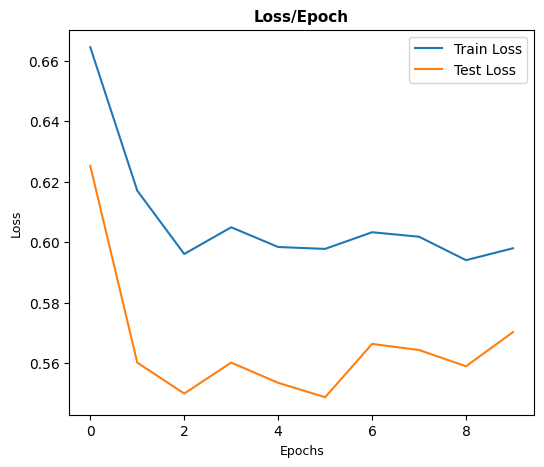

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Test Loss')
ax.set_title('Loss/Epoch', fontdict={'fontsize': 11, 'fontweight': 'bold'})
ax.set_xlabel('Epochs', fontdict={'fontsize': 9})
ax.set_ylabel('Loss', fontdict={'fontsize': 9})
plt.legend()
plt.show()


#### Evaluate the classifier 

In [6]:
# Step 8: 
y_pred = model.predict(X_test, verbose=0)
y_pred = np.round(y_pred).flatten()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=True)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", np.round(accuracy * 100, 2), "%")
print("Precision: ", np.round(precision * 100, 2), "%")
print("Recall: ", np.round(recall * 100, 2), "%")
print("F1-score: ", np.round(f1 * 100, 2), "%")

Accuracy:  73.6 %
Precision:  77.33 %
Recall:  62.37 %
F1-score:  69.05 %
